# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [1]:
!pip install gym==0.26.2 matplotlib==3.8.0 numpy==1.26.0

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import random

env = gym.make("FrozenLake-v1", is_slippery=True)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))

## Training Loop
Complete the training loop

In [3]:
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    initial_epsilon = 1.0
    min_epsilon = 0.01
    num_episodes = 2000
    decay_rate = (initial_epsilon - min_epsilon)/num_episodes
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:
            #TODO select action
            if random.uniform(0,1) < epsilon:
              action = env.action_space.sample()
            else:
              action = np.argmax(Q[state])

            next_state, reward, done, _, _ = env.step(action) #uncomment this after adding algo to choose action

            #TODO Update The Q values
            if not done:
              max_next_q = np.max(Q[next_state])
            else:
              max_next_q = 0

            new_estimate = reward + gamma * max_next_q
            current_q = Q[state, action]
            Q[state,action] = current_q + alpha * (new_estimate - current_q)


            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes

        current_epsilon = initial_epsilon - decay_rate * ep
        current_epsilon = max(min_epsilon, current_epsilon)

        rewards.append(total_reward)
    return rewards

## Plotting Results

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


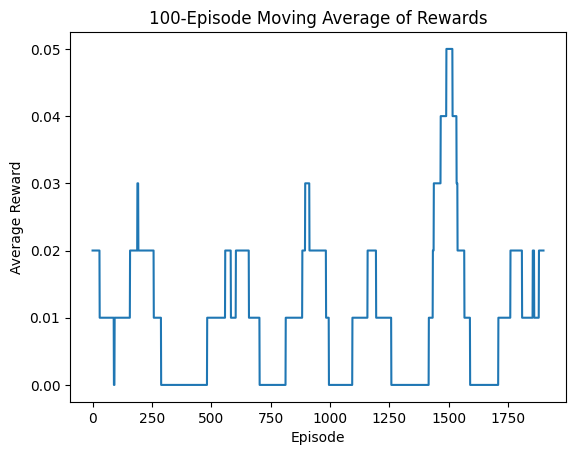

In [4]:
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

## Test the Learned Policy

In [5]:
def test_agent(Q, episodes=5):
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        print(f"Episode {ep + 1}")
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            env.render()
            state = next_state

In [6]:
test_agent(Q)

Episode 1
Episode 2
Episode 3
Episode 4
Episode 5


/usr/local/lib/python3.11/dist-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


# Set is_slippery=False and compare performance.

In [7]:
env2 = gym.make("FrozenLake-v1", is_slippery=False)
state_space_size2 = env2.observation_space.n
action_space_size2 = env2.action_space.n
Q2 = np.zeros((state_space_size2, action_space_size2))

In [8]:
def train_agent2(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    initial_epsilon = 1.0
    min_epsilon = 0.01
    num_episodes = 2000
    decay_rate = (initial_epsilon - min_epsilon)/num_episodes
    for ep in range(episodes):
        state = env2.reset()[0]
        done = False
        total_reward = 0
        while not done:
            #TODO select action
            if random.uniform(0,1) < epsilon:
              action = env2.action_space.sample()
            else:
              action = np.argmax(Q2[state])

            next_state, reward, done, _, _ = env2.step(action) #uncomment this after adding algo to choose action

            #TODO Update The Q values
            if not done:
              max_next_q = np.max(Q2[next_state])
            else:
              max_next_q = 0

            new_estimate = reward + gamma * max_next_q
            current_q = Q2[state, action]
            Q2[state,action] = current_q + alpha * (new_estimate - current_q)


            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes

        current_epsilon = initial_epsilon - decay_rate * ep
        current_epsilon = max(min_epsilon, current_epsilon)

        rewards.append(total_reward)
    return rewards

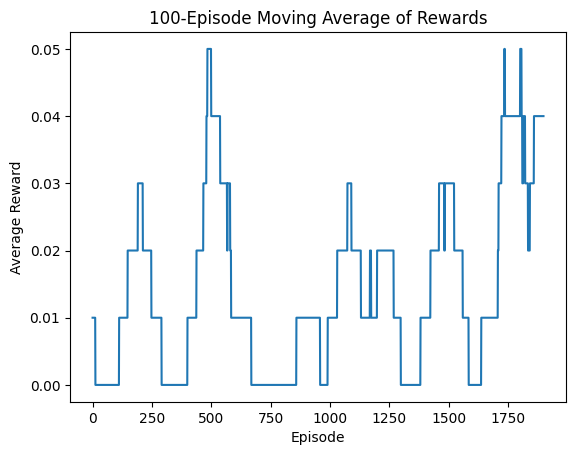

In [9]:
rewards = train_agent2()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

The agent trains much faster and has consistent high rewards when slippery is set to false

# Change the reward for falling into holes.

In [10]:
env.desc

array([[b'S', b'F', b'F', b'F'],
       [b'F', b'H', b'F', b'H'],
       [b'F', b'F', b'F', b'H'],
       [b'H', b'F', b'F', b'G']], dtype='|S1')

In [11]:
env3 = gym.make("FrozenLake-v1", is_slippery=True)
state_space_size3 = env3.observation_space.n
action_space_size3 = env3.action_space.n
Q3 = np.zeros((state_space_size3, action_space_size3))

In [12]:
def train_agent3(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    initial_epsilon = 1.0
    min_epsilon = 0.01
    num_episodes = 2000
    hole_states = [5, 7, 11, 12]
    decay_rate = (initial_epsilon - min_epsilon)/num_episodes
    for ep in range(episodes):
        state = env3.reset()[0]
        done = False
        total_reward = 0
        while not done:
            #TODO select action
            if random.uniform(0,1) < epsilon:
              action = env3.action_space.sample()
            else:
              action = np.argmax(Q3[state])

            next_state, reward, done, _, _ = env3.step(action) #uncomment this after adding algo to choose action

            #reward for falling into the holes
            if next_state in hole_states:
              reward = -1

            #TODO Update The Q values
            if not done:
              max_next_q = np.max(Q3[next_state])
            else:
              max_next_q = 0

            new_estimate = reward + gamma * max_next_q
            current_q = Q3[state, action]
            Q3[state,action] = current_q + alpha * (new_estimate - current_q)


            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes

        current_epsilon = initial_epsilon - decay_rate * ep
        current_epsilon = max(min_epsilon, current_epsilon)

        rewards.append(total_reward)
    return rewards

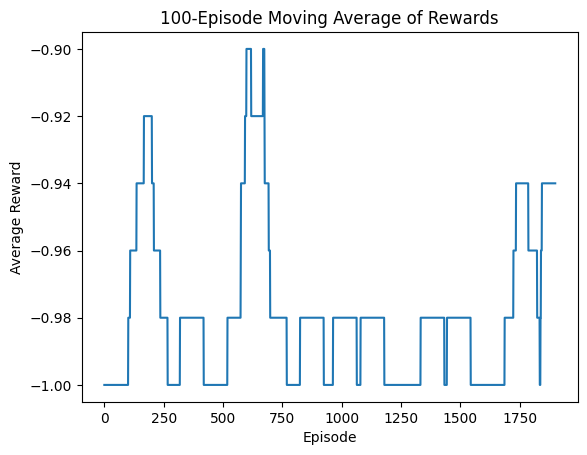

In [13]:
rewards = train_agent3()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

# Add a decaying learning rate α = α0 / (1 + decay * t).

In [14]:
env4 = gym.make("FrozenLake-v1", is_slippery=True)
state_space_size4 = env4.observation_space.n
action_space_size4 = env4.action_space.n
Q4 = np.zeros((state_space_size4, action_space_size4))

In [15]:
def train_agent4(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    initial_epsilon = 1.0
    min_epsilon = 0.01
    num_episodes = 2000
    hole_states = [5, 7, 11, 12]
    decay_rate = (initial_epsilon - min_epsilon)/num_episodes
    alpha_initial = alpha
    alpha_decay_rate = 0.01
    current_alpha = alpha_initial
    for ep in range(episodes):
        state = env3.reset()[0]
        done = False
        total_reward = 0
        while not done:
            #TODO select action
            if random.uniform(0,1) < epsilon:
              action = env3.action_space.sample()
            else:
              action = np.argmax(Q4[state])

            next_state, reward, done, _, _ = env3.step(action) #uncomment this after adding algo to choose action

            #TODO Update The Q values
            if not done:
              max_next_q = np.max(Q4[next_state])
            else:
              max_next_q = 0

            current_alpha = alpha_initial / (1 + alpha_decay_rate * ep)

            new_estimate = reward + gamma * max_next_q
            current_q = Q4[state, action]
            Q4[state,action] = current_q + current_alpha * (new_estimate - current_q)


            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes

        current_epsilon = initial_epsilon - decay_rate * ep
        current_epsilon = max(min_epsilon, current_epsilon)

        rewards.append(total_reward)
    return rewards

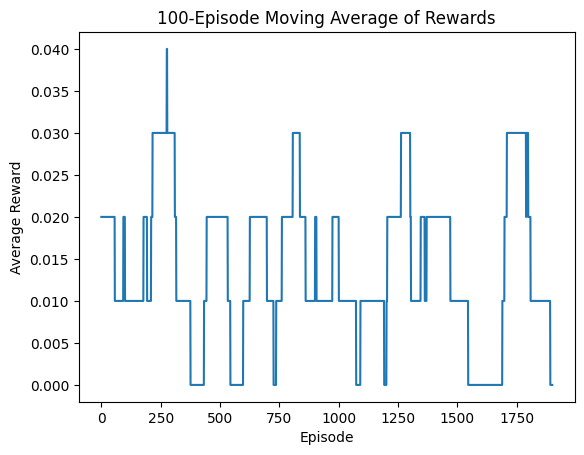

In [16]:
rewards = train_agent4()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

# Visualize the Q-table as a heatmap (optional).

In [17]:
!pip install seaborn

In [18]:
import seaborn as sns

In [19]:
def visualize_q_table_heatmap(Q_table, env_map_shape=(4, 4), title="Q-Table Heatmap"):

    max_q_values_per_state = np.max(Q_table, axis=1)

    q_grid = max_q_values_per_state.reshape(env_map_shape)

    plt.figure(figsize=(8, 6))
    sns.heatmap(q_grid, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

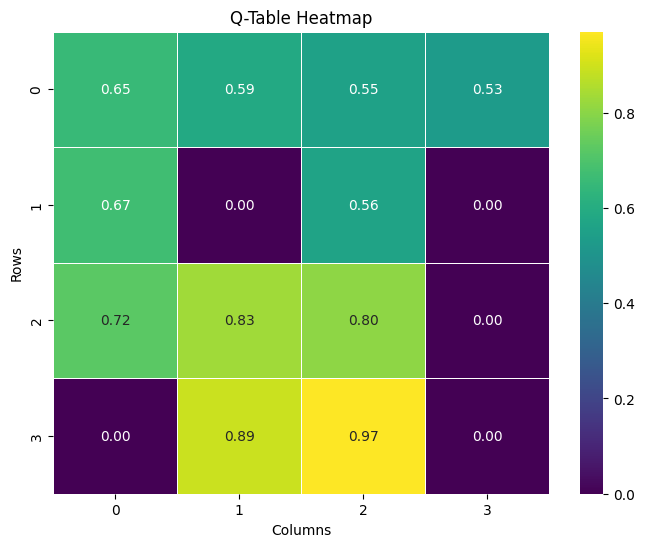

In [20]:
visualize_q_table_heatmap(Q)

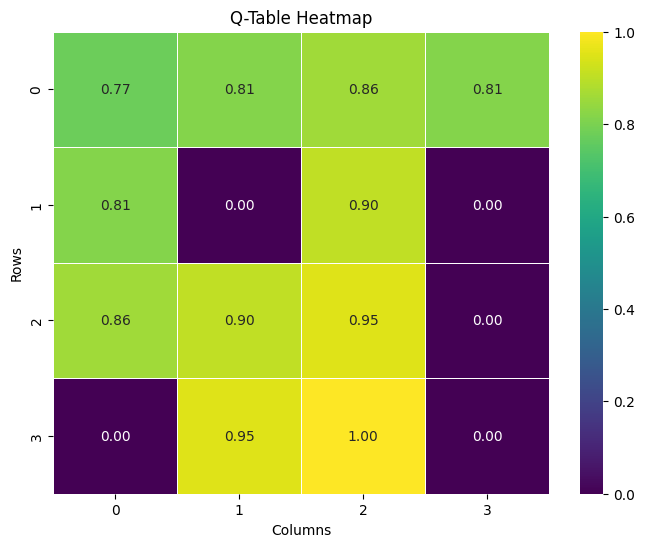

In [21]:
visualize_q_table_heatmap(Q2)

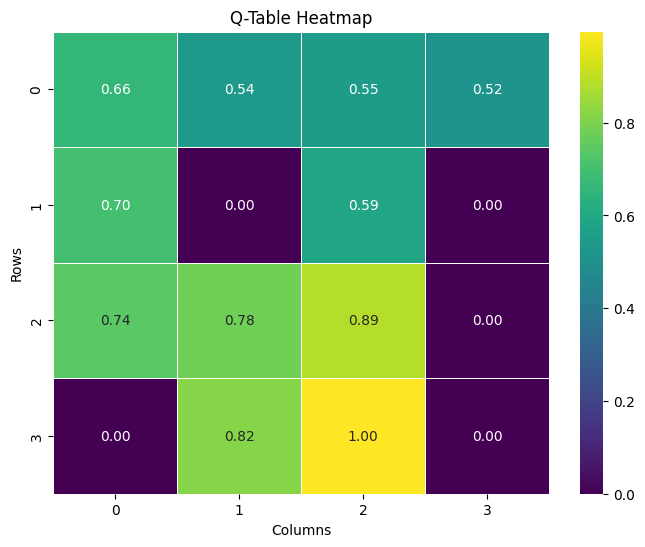

In [22]:
visualize_q_table_heatmap(Q3)

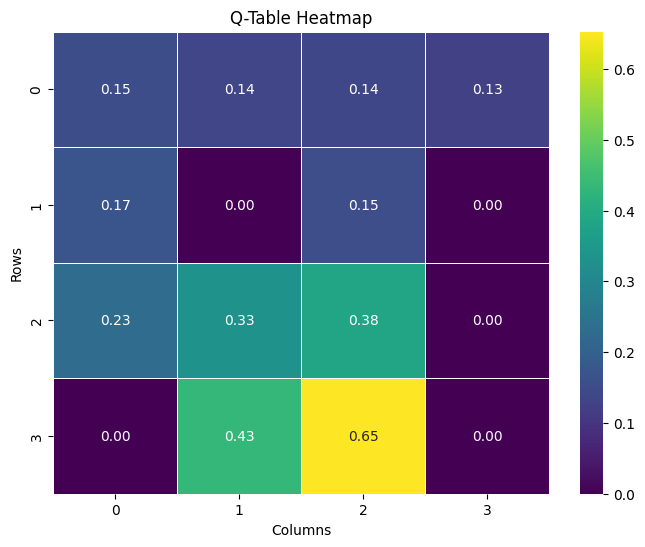

In [23]:
visualize_q_table_heatmap(Q4)